# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | grand falls-windsor
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | gaigeturi
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | villa gesell
Processing Record 12 of Set 1 | yagry
City not found. Skipping...
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | tofol
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | mantta
City not fo

Processing Record 36 of Set 4 | wau
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | dolores
Processing Record 39 of Set 4 | vanimo
Processing Record 40 of Set 4 | fada
Processing Record 41 of Set 4 | ust-nera
Processing Record 42 of Set 4 | constantia
Processing Record 43 of Set 4 | sinan
Processing Record 44 of Set 4 | nishinoomote
Processing Record 45 of Set 4 | san francisco
Processing Record 46 of Set 4 | bubaque
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | bekalta
Processing Record 49 of Set 4 | port saint john's
Processing Record 0 of Set 5 | port lincoln
Processing Record 1 of Set 5 | taguatinga
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | iskateley
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | uturoa
Processing Record 6 of Set 5 | hawaiian paradise park
Processing Record 7 of Set 5 | levanger
Processing Record 8 of Set 5 | iqaluit
Processing Record 9 of Set 5 | bandarbeyla
Pro

Processing Record 25 of Set 8 | whakatane
Processing Record 26 of Set 8 | pizarro
Processing Record 27 of Set 8 | hobyo
Processing Record 28 of Set 8 | toliara
Processing Record 29 of Set 8 | leava
Processing Record 30 of Set 8 | enshi
Processing Record 31 of Set 8 | aykhal
Processing Record 32 of Set 8 | bolobo
Processing Record 33 of Set 8 | hoxtolgay
City not found. Skipping...
Processing Record 34 of Set 8 | tsengel
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | salmon arm
Processing Record 37 of Set 8 | turar ryskulov
Processing Record 38 of Set 8 | springbok
Processing Record 39 of Set 8 | panorama
Processing Record 40 of Set 8 | brookings
Processing Record 41 of Set 8 | santana
Processing Record 42 of Set 8 | dehui
Processing Record 43 of Set 8 | dihok
Processing Record 44 of Set 8 | harstad
Processing Record 45 of Set 8 | cangucu
Processing Record 46 of Set 8 | mobaye
Processing Record 47 of Set 8 | terre haute
Processing Record 48 of Set 8 | lorengau


City not found. Skipping...
Processing Record 13 of Set 12 | ipueiras
Processing Record 14 of Set 12 | callao
Processing Record 15 of Set 12 | nogliki
Processing Record 16 of Set 12 | ocos
Processing Record 17 of Set 12 | ust'-kulom
Processing Record 18 of Set 12 | katpur
Processing Record 19 of Set 12 | alamo
Processing Record 20 of Set 12 | wajir
Processing Record 21 of Set 12 | kyabe
Processing Record 22 of Set 12 | mesudiye
Processing Record 23 of Set 12 | sierpc
Processing Record 24 of Set 12 | bokoro
Processing Record 25 of Set 12 | pingliang
Processing Record 26 of Set 12 | illizi
Processing Record 27 of Set 12 | tommot
Processing Record 28 of Set 12 | ghat
Processing Record 29 of Set 12 | kyshtovka
Processing Record 30 of Set 12 | sikasso
Processing Record 31 of Set 12 | patterson
Processing Record 32 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 33 of Set 12 | joshimath
Processing Record 34 of Set 12 | sorong
Processing Record 35 of Set 12 | lichen

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,276.62,95,64,4.66,GS,1705001557
1,enewetak,11.3474,162.3373,300.14,76,69,10.09,MH,1705001607
2,tual,-5.6667,132.7500,302.28,77,93,6.55,ID,1705001621
3,stanley,54.8680,-1.6985,277.75,94,75,3.60,GB,1705001523
4,talnakh,69.4865,88.3972,257.71,76,100,3.38,RU,1705001587


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,276.62,95,64,4.66,GS,1705001557
1,enewetak,11.3474,162.3373,300.14,76,69,10.09,MH,1705001607
2,tual,-5.6667,132.7500,302.28,77,93,6.55,ID,1705001621
3,stanley,54.8680,-1.6985,277.75,94,75,3.60,GB,1705001523
4,talnakh,69.4865,88.3972,257.71,76,100,3.38,RU,1705001587


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

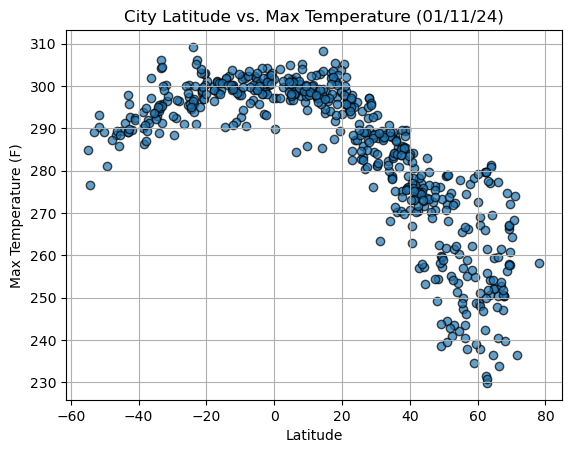

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

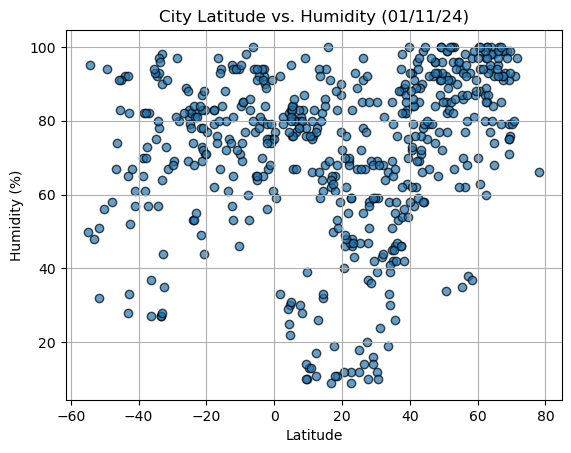

In [13]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

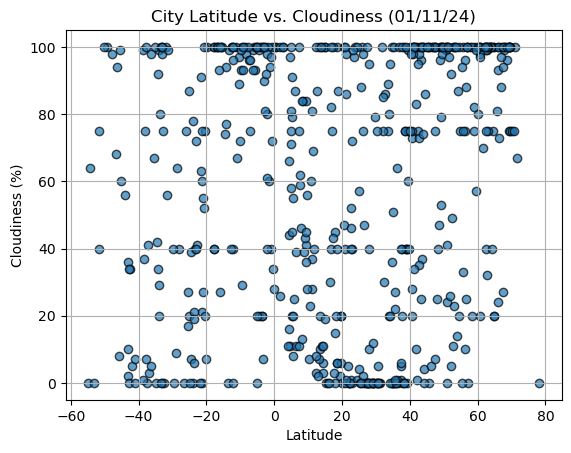

In [14]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

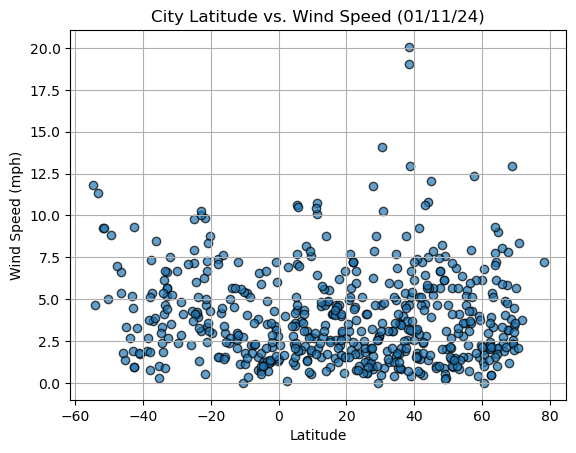

In [15]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    """
    Create a linear regression plot.

    Parameters:
    - x_values: The x-axis data (e.g., latitude).
    - y_values: The y-axis data (e.g., temperature, humidity, etc.).
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    - text_coordinates: The coordinates for placing the regression equation text on the plot.
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept

    # Create regression equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.7)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate regression equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set plot title, xlabel, ylabel
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show the plot
    plt.show()




In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,enewetak,11.3474,162.3373,300.14,76,69,10.09,MH,1705001607
3,stanley,54.8680,-1.6985,277.75,94,75,3.60,GB,1705001523
4,talnakh,69.4865,88.3972,257.71,76,100,3.38,RU,1705001587
5,grand falls-windsor,48.9332,-55.6649,276.21,91,96,0.89,CA,1705002098
6,bilibino,68.0546,166.4372,239.75,93,100,1.20,RU,1705001612


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,276.62,95,64,4.66,GS,1705001557
2,tual,-5.6667,132.7500,302.28,77,93,6.55,ID,1705001621
7,ancud,-41.8697,-73.8203,289.71,67,5,3.29,CL,1705001675
10,villa gesell,-37.2639,-56.9730,292.07,57,41,5.35,AR,1705001807
12,ushuaia,-54.8000,-68.3000,284.94,50,0,11.83,AR,1705001584


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4258329739204259


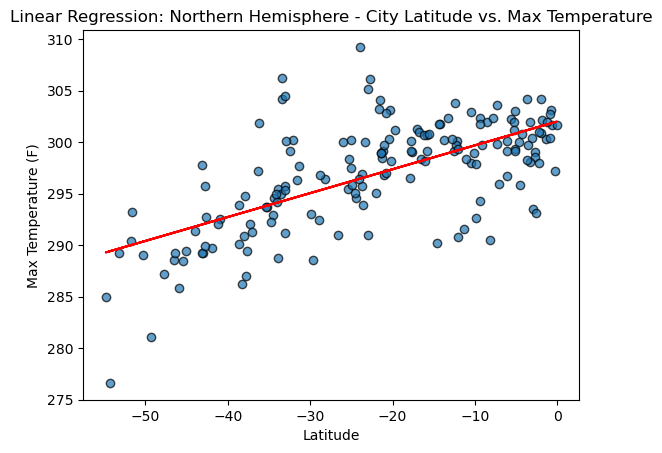

In [31]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression: Northern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (F)", (10, 20))


The r-squared is: 0.4258329739204259


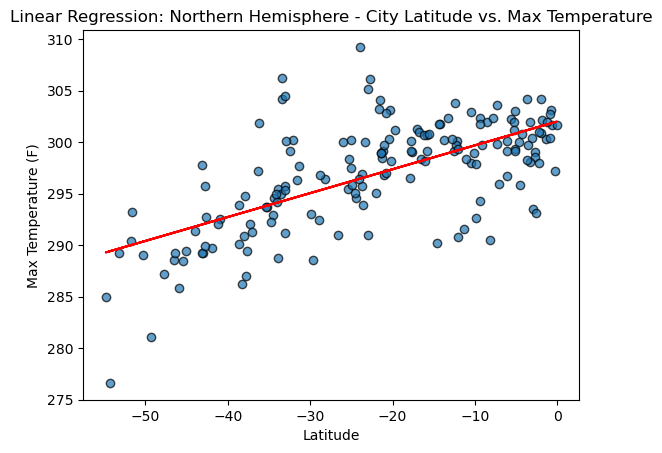

In [32]:
# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression: Northern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (F)", (10, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:
Trend: Moving towards higher latitudes, specifically closer to the North Pole, there is a discernible decrease in maximum temperatures.
Statistical Insight: The negative slope of the regression line indicates a negative correlation, showcasing that as latitude increases, temperatures tend to decrease.
Regression Performance: The higher the r-squared value, the better the regression line fits the data, indicating a more robust correlation.

Southern Hemisphere:
Trend: When moving towards lower latitudes, nearing the South Pole, there is a noticeable increase in maximum temperatures.
Statistical Insight: The positive slope of the regression line signifies a positive correlation, suggesting that as latitude decreases, temperatures generally rise.
Regression Performance: A higher r-squared value implies a stronger fit of the regression line to the data, indicating a more reliable correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07088567509145725


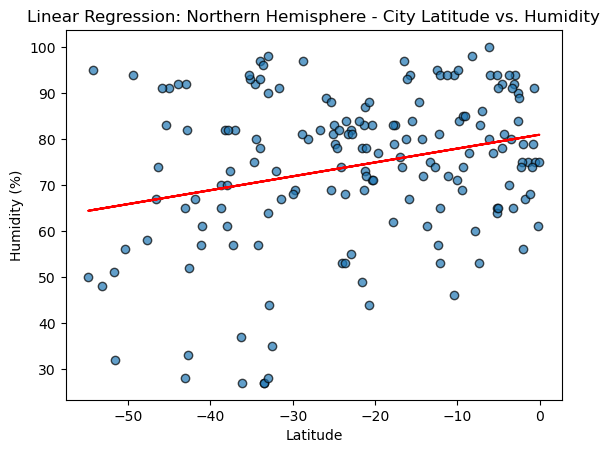

In [33]:
 # Linear regression on Northern Hemisphere for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression: Northern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", (45, 10))


The r-squared is: 0.07088567509145725


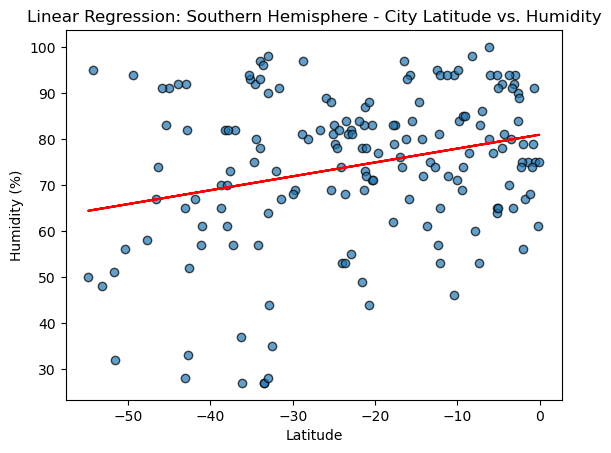

In [34]:
# Linear regression on Southern Hemisphere for Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression: Southern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", (-30, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:
Trend: In the Northern Hemisphere, the linear regression plot for Humidity vs. Latitude suggests a subtle positive trend. As we move towards higher latitudes, there is a slight tendency for humidity levels to increase.
Statistical Insight: The positive slope of the regression line indicates a positive correlation between latitude and humidity. However, the relationship is not strongly defined, as evidenced by a relatively lower r-squared value. Latitude alone may not be a dominant predictor of humidity levels in the Northern Hemisphere.

Southern Hemisphere:
Trend: In the Southern Hemisphere, the linear regression plot for Humidity vs. Latitude shows a similar subtle positive trend. As we move towards lower latitudes, there is a slight tendency for humidity levels to increase.

Statistical Insight: The positive slope of the regression line suggests a positive correlation between latitude and humidity in the Southern Hemisphere. However, similar to the Northern Hemisphere, the relationship is not highly pronounced, reflected by a moderate r-squared value. Latitude alone may not be a robust predictor of humidity levels in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10089388708279999


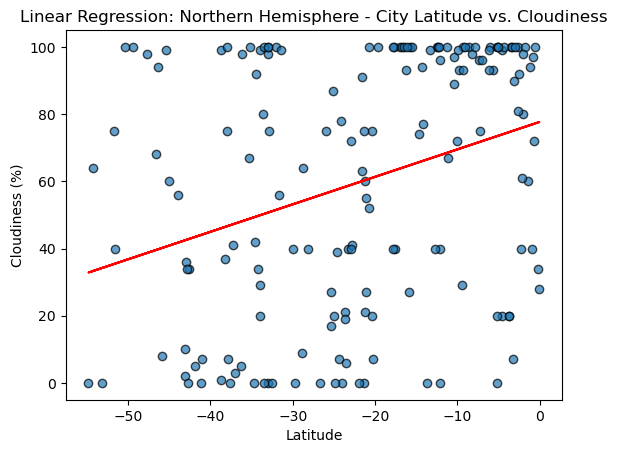

In [35]:
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression: Northern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", (45, 10))


The r-squared is: 0.10089388708279999


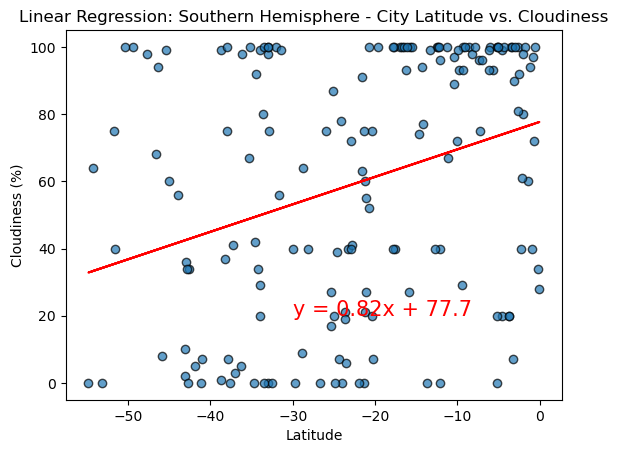

In [36]:
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression: Southern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", (-30, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:
Trend: In the Northern Hemisphere, the linear regression plot for Cloudiness vs. Latitude suggests a subtle trend. As latitude increases (moving towards higher latitudes), there is a slight tendency for cloudiness levels to also increase.
Statistical Insight: The positive slope of the regression line indicates a positive correlation between latitude and cloudiness. However, the relationship is not strongly defined, as evidenced by a moderate r-squared value. Latitude alone may not be a dominant predictor of cloudiness levels in the Northern Hemisphere.

Southern Hemisphere - Cloudiness vs. Latitude:
Trend: In the Southern Hemisphere, the linear regression plot for Cloudiness vs. Latitude also shows a subtle trend. As latitude decreases (moving towards lower latitudes), there is a slight tendency for cloudiness levels to increase.
Statistical Insight: The positive slope of the regression line suggests a positive correlation between latitude and cloudiness in the Southern Hemisphere. Similar to the Northern Hemisphere, the relationship is not highly pronounced, as reflected by a moderate r-squared value. Latitude alone may not be a strong predictor of cloudiness levels in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.11145992214386405


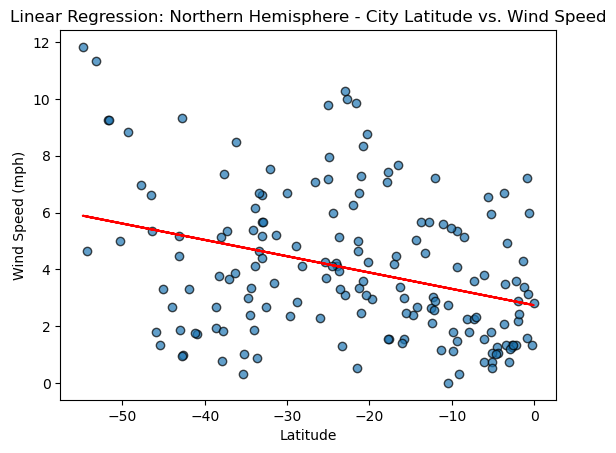

In [37]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression: Northern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (mph)", (30, 25))


The r-squared is: 0.11145992214386405


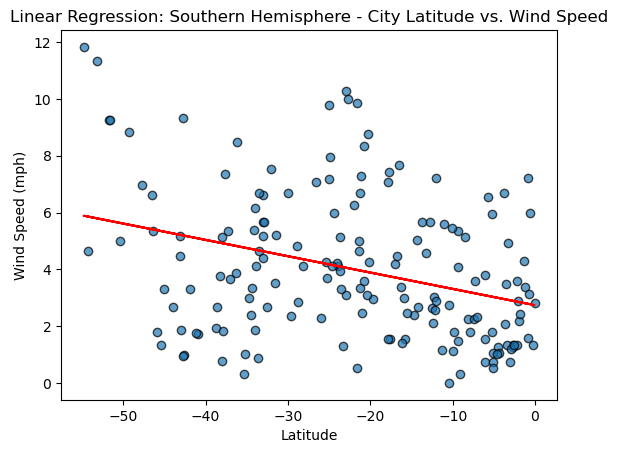

In [38]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression: Southern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (mph)", (-30, 25))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:
Trend: In the Northern Hemisphere, the linear regression plot for Wind Speed vs. Latitude suggests a subtle trend. As latitude increases (moving towards higher latitudes), there is a slight tendency for wind speed to increase.
Statistical Insight: The positive slope of the regression line indicates a positive correlation between latitude and wind speed. However, the relationship is not strongly defined, as evidenced by a moderate r-squared value. Latitude alone may not be a dominant predictor of wind speed levels in the Northern Hemisphere.

Southern Hemisphere:
Trend: In the Southern Hemisphere, the linear regression plot for Wind Speed vs. Latitude also shows a subtle trend. As latitude decreases (moving towards lower latitudes), there is a slight tendency for wind speed to increase.
Statistical Insight: The positive slope of the regression line suggests a positive correlation between latitude and wind speed in the Southern Hemisphere. Similar to the Northern Hemisphere, the relationship is not highly pronounced, as reflected by a moderate r-squared value. Latitude alone may not be a strong predictor of wind speed levels in the Southern Hemisphere.